# **Scraping**

In [ ]:
pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.8 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google_play_scraper import search

result = search(
    "Snapchat",
    lang="en",
    country="in",
    n_hits=1
)

for item in result:
    appid = item.get("appId")
    title = item.get("title")
    print(f"App ID: {appid}, Title: {title}")

App ID: com.snapchat.android, Title: Snapchat


In [ ]:
from google_play_scraper import Sort, reviews
import pandas as pd

# Scraping 100 reviews for the app (example: Twitter)
result, continuation_token = reviews(
    'com.snapchat.android',
    lang='en',
    country="in",
    sort=Sort.NEWEST,
    count=40000,
)

# Convert the result to a DataFrame with only relevant columns
df_reviews = pd.DataFrame(result)

df_reviews.to_csv('Reddit_reviews_data_40000.csv', index=True)

print("Relevant reviews saved to Reddit_reviews_relevant.csv")


Relevant reviews saved to Reddit_reviews_relevant.csv


# **DATA**

In [ ]:
pip install tabulate

In [ ]:
import pandas as pd
from tabulate import tabulate

# Load the CSV file into a DataFrame
df_reviews = pd.read_csv('snapchat_reviews_data_40000.csv')

print(tabulate(df_reviews.head(), headers='keys', tablefmt='pretty'))

print("\nBasic Information:")
print(tabulate(pd.DataFrame(df_reviews.dtypes, columns=['Data Type']), headers='keys', tablefmt='pretty'))

# Display basic statistics (if applicable)
print("\nStatistics:")
print(tabulate(df_reviews.describe(), headers='keys', tablefmt='pretty'))

+---+------------+--------------------------------------+---------------+--------------------------------------------------------------------------------------------------------------------------+---------------------------------+-------+---------------+----------------------+---------------------+--------------+-----------+------------+
|   | Unnamed: 0 |               reviewId               |   userName    |                                                        userImage                                                         |             content             | score | thumbsUpCount | reviewCreatedVersion |         at          | replyContent | repliedAt | appVersion |
+---+------------+--------------------------------------+---------------+--------------------------------------------------------------------------------------------------------------------------+---------------------------------+-------+---------------+----------------------+---------------------+--------------+------

# **Cleaning**

In [ ]:
# Removing duplicates
duplicates = df_reviews.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

# Drop duplicate rows
data_duplicate = df_reviews.drop_duplicates()

# Verify that duplicates are removed
print(df_reviews.duplicated())
print(df_reviews.duplicated().sum())

Number of duplicates: 0
0        False
1        False
2        False
3        False
4        False
         ...  
39995    False
39996    False
39997    False
39998    False
39999    False
Length: 40000, dtype: bool
0


In [ ]:
# Check for missing values
print(data_duplicate.isnull().sum())

Unnamed: 0                  0
reviewId                    0
userName                    0
userImage                   0
content                     2
score                       0
thumbsUpCount               0
reviewCreatedVersion    14217
at                          0
replyContent            40000
repliedAt               40000
appVersion              14217
dtype: int64


In [ ]:
import pandas as pd
from tabulate import tabulate

# Define the columns to keep
columns_to_keep = ['reviewId', 'userName', 'content', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at']

# Drop all other columns except for the specified ones
data_cleaned = data_duplicate[columns_to_keep]

data_cleaned = data_cleaned.dropna(subset=['content', 'reviewCreatedVersion'])

# Remove rows where 'content' or 'reviewCreatedVersion' is an empty string
data_cleaned = data_cleaned[(data_cleaned['content'].str.strip() != '') & (data_cleaned['reviewCreatedVersion'].str.strip() != '')]

# Display first few rows of the cleaned data
print(tabulate(data_cleaned.head(), headers='keys', tablefmt='pretty'))

# Display basic information about the DataFrame
print("\nBasic Information:")
print(tabulate(pd.DataFrame(data_cleaned.dtypes, columns=['Data Type']), headers='keys', tablefmt='pretty'))

# Display basic statistics (if applicable)
print("\nStatistics:")
print(tabulate(data_cleaned.describe(), headers='keys', tablefmt='pretty'))


+---+--------------------------------------+---------------+---------------------------------------------+-------+---------------+----------------------+---------------------+
|   |               reviewId               |   userName    |                   content                   | score | thumbsUpCount | reviewCreatedVersion |         at          |
+---+--------------------------------------+---------------+---------------------------------------------+-------+---------------+----------------------+---------------------+
| 0 | 462866b6-c94b-40f1-bc70-50ec5f525460 | A Google user |       Best better great just leave it       |   5   |       0       |      13.16.0.40      | 2024-11-23 13:57:32 |
| 1 | a9922e3c-3e4a-43a5-b543-4f49f840958f | A Google user |        Please give wide angle camera        |   5   |       0       |      13.16.0.40      | 2024-11-23 13:56:51 |
| 2 | c840d570-1703-434a-8f17-8b9f1b3b79e9 | A Google user |                Best ❤️❤️❤️❤️                |   5   |      

In [ ]:
# Check for missing values
print(data_cleaned.isnull().sum())

reviewId                0
userName                0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
dtype: int64


In [ ]:
data_cleaned.to_csv('snapchat_cleaned_reviews_data.csv', index=False)

# **Exploratory Data Analysis**

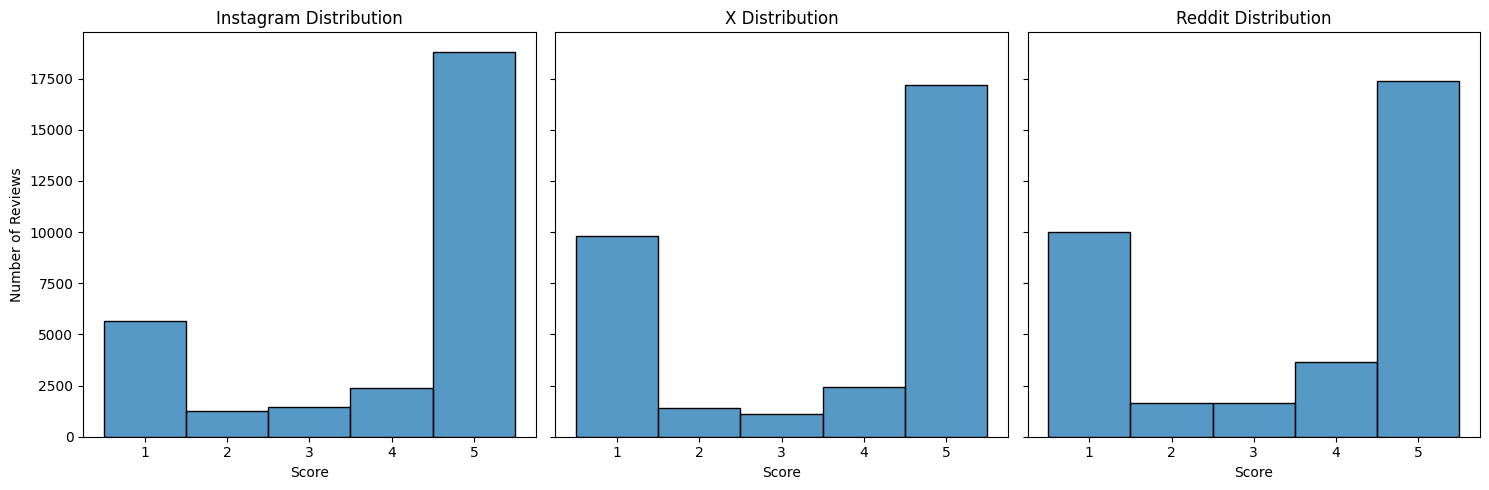

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV files into separate DataFrames
df1 = pd.read_csv('Instagram_cleaned_reviews_data.csv')
df2 = pd.read_csv('X_cleaned_reviews_data.csv')
df3 = pd.read_csv('Reddit_cleaned_reviews_data.csv')

# Define the bins for the scores 1, 2, 3, 4, 5
bins = [1, 2, 3, 4, 5, 6]

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plot the histogram for the first app
sns.histplot(df1['score'], bins=bins, kde=False, discrete=True, ax=axes[0])
axes[0].set_title('Instagram Distribution')
axes[0].set_xlabel('Score')
axes[0].set_xticks([1, 2, 3, 4, 5])

# Plot the histogram for the second app
sns.histplot(df2['score'], bins=bins, kde=False, discrete=True, ax=axes[1])
axes[1].set_title('X Distribution')
axes[1].set_xlabel('Score')
axes[1].set_xticks([1, 2, 3, 4, 5])

# Plot the histogram for the third app
sns.histplot(df3['score'], bins=bins, kde=False, discrete=True, ax=axes[2])
axes[2].set_title('Reddit Distribution')
axes[2].set_xlabel('Score')
axes[2].set_xticks([1, 2, 3, 4, 5])

# Set shared ylabel
axes[0].set_ylabel('Number of Reviews')

plt.tight_layout()
plt.show()


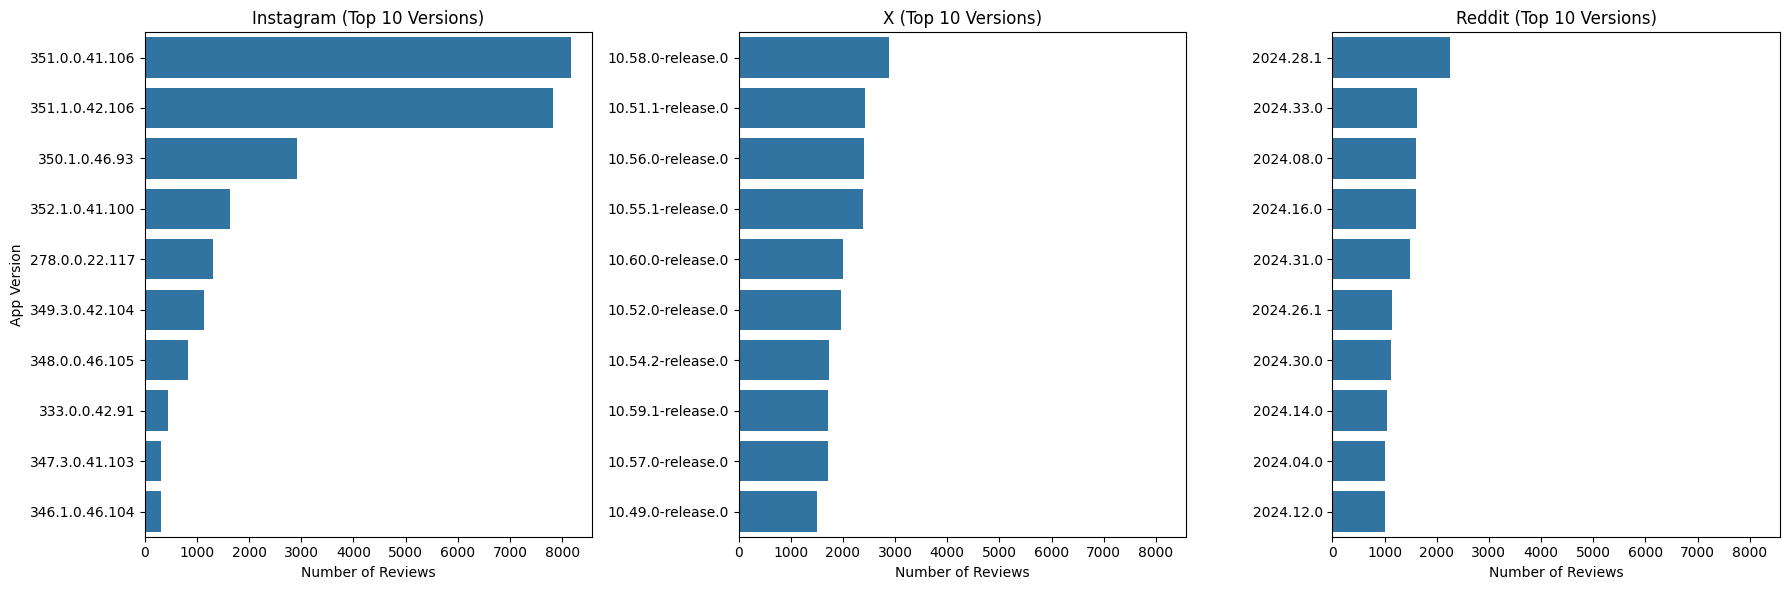

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True)

# Plot the countplot for the Instagram
sns.countplot(y='reviewCreatedVersion',
              data=df1,
              order=df1['reviewCreatedVersion'].value_counts().index[:10],
              ax=axes[0])
axes[0].set_title('Instagram (Top 10 Versions)')
axes[0].set_xlabel('Number of Reviews')
axes[0].set_ylabel('App Version')

# Plot the countplot for the X
sns.countplot(y='reviewCreatedVersion',
              data=df2,
              order=df2['reviewCreatedVersion'].value_counts().index[:10],
              ax=axes[1])
axes[1].set_title('X (Top 10 Versions)')
axes[1].set_xlabel('Number of Reviews')
axes[1].set_ylabel('')

# Plot the countplot for Reddit
sns.countplot(y='reviewCreatedVersion',
              data=df3,
              order=df3['reviewCreatedVersion'].value_counts().index[:10],
              ax=axes[2])
axes[2].set_title('Reddit (Top 10 Versions)')
axes[2].set_xlabel('Number of Reviews')
axes[2].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()


# Sentiment analysis



In [ ]:
!pip install transformers

In [ ]:
pip install --upgrade transformers huggingface_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 27.5 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.9.1
    Uninstalling huggingface-hub-0.9.1:
      Successfully uninstalled huggingface-hub-0.9.1
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.12.1
    Uninstalling tokenizers-0.12.1:
      Successfully uninstalled tokenizers-0.12.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.21.2
    Uninstalling transformers-4.21.2:
      Successfully uninstalled transformers-4.21.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the fo

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, AutoConfig
import pandas as pd
import numpy as np
from scipy.special import softmax

# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

# Load model, tokenizer, and config
MODEL = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

# Define a function to get sentiment scores
def get_sentiment_scores(text):
    text = preprocess(text)
    encoded_input = tokenizer(text, return_tensors='pt', truncation=True, max_length=512)
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    ranking = np.argsort(scores)[::-1]  # Sort in descending order of scores
    sentiment = config.id2label[ranking[0]]  # Get the highest-scoring label
    confidence = scores[ranking[0]]  # Get the confidence score for that label
    print(sentiment)
    return sentiment

# Load your CSV file
input_file = "/content/snapchat_cleaned_reviews_data.csv"  # Replace with your input file name
output_file = "snapchat_output_sentiment.csv"  # Replace with desired output file name
df = pd.read_csv(input_file)

# Apply sentiment analysis to each row
df['sentiment'] = None  # Add a column for sentiment labels


for index, row in df.iterrows():
    text = row['content']  # Replace 'text' with the name of your text column
    sentiment = get_sentiment_scores(text)
    df.at[index, 'sentiment'] = sentiment


# Save the results to a new CSV file
df.to_csv(output_file, index=False)

print(f"Sentiment analysis completed. Results saved to {output_file}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Streaming output truncated to the last 5000 lines.
positive
negative
positive
positive
neutral
positive
positive
positive
neutral
positive
positive
positive
positive
positive
positive
positive
positive
neutral
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
neutral
negative
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
neutral
neutral
negative
neutral
positive
neutral
positive
positive
positive
neutral
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
neutral
positive
neutral
positive
positive
positive
neutral
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
neutral
positive
positive
positive
neutral
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
neutral
negative
p